<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/Data_Mining/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbor (kNN) assignment

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Mnist dataset 불러오기

In [0]:
from sklearn.datasets import fetch_openml

# load mnist data
mnist_data = fetch_openml('mnist_784')
X_data = mnist_data.data
Y_data = mnist_data.target.astype('int32')
# shuffling data
shuffle_mask = np.arange(X_data.shape[0])
np.random.shuffle(shuffle_mask)
X_data = X_data[shuffle_mask]
Y_data = Y_data[shuffle_mask]
# divide data : train, test data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10000, 784)
(1000, 784)
(10000,)
(1000,)


# Mnist 이미지 출력

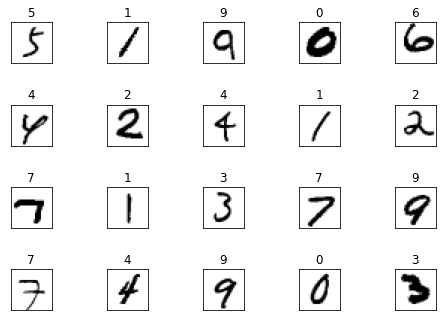

In [0]:
sample_X = X_train[:20]
sample_Y = Y_train[:20]

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%sample_Y[i])
    subplot.imshow(sample_X[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

# # Problem 1 (10 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 두번 사용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- distance matrix(dist_mat) : numpy array of shape (test data 수, train data 수). (dist_mat[i,j] : i번째 test data와 j번째 train data 사이의 거리)
- 거리는 L2 distance로 구할 것.

In [0]:
def Problem_1(X_test, X_train):
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    
    for i in range(test_num):
        for j in range(train_num):
            ############# Put your code here ################
            dist_mat[i][j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))
            #################################################
    return dist_mat
print(Problem_1(X_test, X_train))

[[2393.88136715 2207.57355483 2435.8557018  ... 2417.08398696
  2543.60197358 2890.5082598 ]
 [1919.93619686 1650.56293427 2591.81943816 ... 2176.89411777
  2477.25977645 2887.47796528]
 [2644.55345947 2812.19522793 2769.34902098 ... 2880.72039601
  2897.27803291 2782.21728123]
 ...
 [2012.48527945 2138.69679946 2366.12425709 ... 2296.02264797
  2268.4228001  2701.74702739]
 [2643.14244792 3122.5465569  3028.8121434  ... 2968.18513574
  2921.40907783 3181.00267211]
 [1768.32887213 2074.64069178 2614.6663267  ... 2153.72421633
  2218.47695503 2895.61098907]]


# # Problem 2 (20 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 사용하지 않고 numpy 연산만을 이용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- L2 distance로 거리를 구할 것.

In [0]:
def Problem_2(X_test, X_train):
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    ############# Put your code here ################
    test_sum = np.sum(X_test**2, axis=1)
    train_sum = np.sum(X_train**2, axis=1)
    dist_mat = np.sqrt((test_sum[:, np.newaxis] + train_sum) - 2*np.matmul(X_test, X_train.T))
    #################################################        
    return dist_mat
print(Problem_2(X_test, X_train))

[[2393.88136715 2207.57355483 2435.8557018  ... 2417.08398696
  2543.60197358 2890.5082598 ]
 [1919.93619686 1650.56293427 2591.81943816 ... 2176.89411777
  2477.25977645 2887.47796528]
 [2644.55345947 2812.19522793 2769.34902098 ... 2880.72039601
  2897.27803291 2782.21728123]
 ...
 [2012.48527945 2138.69679946 2366.12425709 ... 2296.02264797
  2268.4228001  2701.74702739]
 [2643.14244792 3122.5465569  3028.8121434  ... 2968.18513574
  2921.40907783 3181.00267211]
 [1768.32887213 2074.64069178 2614.6663267  ... 2153.72421633
  2218.47695503 2895.61098907]]


# # Problem 3 (10 pts)
time 라이브러리를 이용하여 Problem_1, Problem_2 함수의 실행시간(초)을 측정한 후 비교하고, 두 함수에서 계산된 distance matrix가 같은 matrix임을 보이시오.

In [0]:
import time

dist_mat_two_loop = None
dist_mat_no_loop = None
problem1_time = None
problem2_time = None

############# Put your code here ################
start = time.time()
dist_mat_two_loop = Problem_1(X_test, X_train)
problem1_time = time.time() - start

start = time.time()
dist_mat_no_loop = Problem_2(X_test, X_train)
problem2_time = time.time() - start
#################################################   


print('Problem1 (two for loop) execution time : %f'%problem1_time)
print('Problem2 (no for loop) execution time : %f'%problem2_time)

difference = np.linalg.norm(dist_mat_two_loop - dist_mat_no_loop, ord='fro')
if difference < 0.001:
    print('The distance matrices are the same')
else:
    print('The distance matrices are different')

Problem1 (two for loop) execution time : 103.408694
Problem2 (no for loop) execution time : 0.323532
The distance matrices are the same


# # Problem 4 (10 pts)
KNN 알고리즘으로 test 데이터의 label 값을 예측하여 return 해주는 함수를 만들고, 실제 label 값과 비교하여 예측의 정확도를 구하시오.
- 위에서 구한 distance matrix를 이용.
- k = 3

In [0]:
def Problem_4(dist_mat, k, Y_train):
    test_num = dist_mat.shape[0]
    Y_predict = np.zeros(test_num)
    for i in range(test_num):
        ############# Put your code here ################
        cnt = np.zeros((1, 10))
        temp = np.argsort(dist_mat[i, :])
        for j in range(0, k):
            idx = Y_train[temp[j]]
            cnt[0][idx] = cnt[0][idx]+1
        cnt = cnt.argsort()
        Y_predict[i] = cnt[0][9]
        #################################################   
    return Y_predict

y_pred = Problem_4(dist_mat_no_loop, 3, Y_train)
accuracy = 0
############# Put your code here ################
ret = y_pred - Y_test
ret = np.sum(np.where(ret==0, 1, 0))
accuracy = ret
accuracy = (accuracy / Y_test.shape[0])
#################################################
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.947000


# # Problem 5 (20 pts)
training 데이터를 split 하여, 5 fold cross validation을 수행하고 최적의 hyper parameter K 를 찾으시오. 또한, cross validation 기법을 사용하는 이유를 조사한 후 간단히 서술하시오.
- numpy 외 다른 라이브러리 사용 금지.
- 위에서 정의한 함수들 이용.
- k_candidate list에 hyper parameter k 후보들을 저장. ex) k_candidate = [3, 5, 7, 10, 15]
- accuracy_dict[x]에 k = x 일때 5개의 validation accuracy 저장. ex) print(accuracy_dict[3]) -> [70.01, 68.93, 54.412, 65.643, 68.85]
- https://www.youtube.com/watch?v=OoUX-nOEjG0&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=2 28분30초~39분30초 참고.

cross validation 사용 이유 : 데이터의 수가 적은 경우 train, validation, test set으로 분할 경우 train set의 수가 적어서 underfitting된 모델이 발생할 수 있습니다. 따라서 train set을 k개의 fold로 나눈 다음 각 fold를 validation set으로 사용하여 모델의 parameter를 개선하면 평가에 사용되는 데이터의 편중을 막을 수 있고 보다 더 많은 데이터를 학습에 사용할 수 있습니다. 뿐만 아니라 각 fold에서의 에러율을 비교하여 좀 더 정확하고 일반화된 모델을 찾을 수 있습니다.

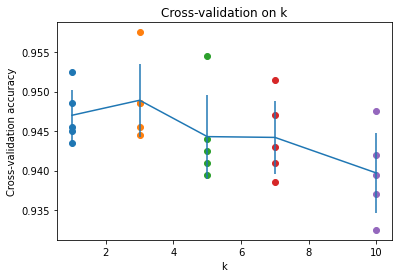

In [0]:
num_fold = 5
k_candidate = [1, 3, 5, 7, 10]
accuracy_dict = {}
X_train_folds = []
Y_train_folds = []
for k in k_candidate:
    accuracy_dict[k] = []

############# Put your code here ################
sp = int(X_train.shape[0]/5)
#################################################
for i in range(num_fold):
    ############# Put your code here ################
    X_train_folds = np.zeros((0, X_train.shape[1]))
    Y_train_folds = np.zeros((8000), dtype=int)
    X_test_folds = X_train[i*sp:(i+1)*sp]
    Y_test_folds = Y_train[i*sp:(i+1)*sp]
    a=0
    for j in range(0, 5):
        if i==j:
            continue
        X_train_folds = np.vstack([X_train_folds, X_train[(j*sp):(j+1)*sp]])
        Y_train_folds[a*sp:(a+1)*sp] = Y_train[j*sp:(j+1)*sp]
        a=a+1
    #################################################
    for k in k_candidate:
        ############# Put your code here ################
        dist = Problem_2(X_test_folds, X_train_folds) # distance
        temp = Problem_4(dist, k, Y_train_folds) # pred_y return func
        ret = Y_test_folds - temp
        T = np.sum(np.where(ret==0, 1, 0))
        accuracy_dict[k].append(T/Y_test_folds.shape[0])
        #################################################   
      
for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# #Problem 6 (10 pts)
Problem5 에서 구한 best hyperparameter k와 Problem4에서 작성한 함수를 이용하여 test 데이터의 label 값을 예측하고, 정확도를 구하시오.

In [0]:
best_k = 7##### Your best k ##########

y_pred = Problem_4(dist_mat_no_loop, best_k, Y_train)
accuracy = None
############# Put your code here ################
temp = y_pred - Y_test
ret = np.sum(np.where(temp==0, 1, 0))
accuracy = ret / Y_test.shape[0]
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.944000


# #Problem 7 (20 pts)
Problem5, Problem6의 과정을 Scikit-learn 라이브러리를 이용하여 수행하시오.
- sklearn.neighbors.KNeighborsClassifier, sklearn.model_selection.cross_val_score 함수 사용법을 구글링 해볼 것.

[0.946  0.9515 0.9495 0.9455 0.942 ]
[0.943  0.9475 0.941  0.953  0.9465]
[0.94   0.9445 0.94   0.9505 0.9415]
[0.9375 0.946  0.939  0.947  0.94  ]
[0.9275 0.9395 0.9395 0.947  0.9345]


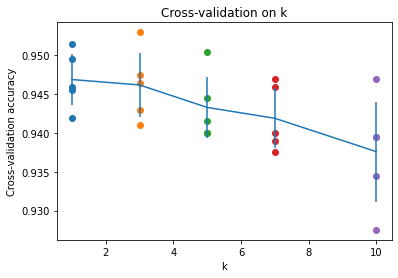

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

k_candidate = [1, 3, 5, 7, 10]
accuracy_dict = {}
for k in k_candidate:
    accuracy_dict[k] = []

for k in k_candidate:
    ############# Put your code here ################
    neigh = KNeighborsClassifier(n_neighbors=k)
    accuracy_dict[k] = cross_val_score(neigh, X_train, Y_train, cv=5)
    #################################################   

for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [0]:
best_k = 3##### Your best k ##########

y_pred = np.zeros((Y_test.shape[0], 1))
accuracy = None
############# Put your code here ################
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)
ret = Y_test - y_pred
accuracy = np.sum(np.where(ret==0, 1, 0)) / Y_test.shape[0]
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.946000
